Problem Description:

A Chinese automobile company aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. Essentially, the company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

Business Goal:

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for the management to
understand the pricing dynamics of a new market.

1. Loading and Preprocessing
   
 Load the dataset and perform necessary preprocessing steps.

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('CarPrice_Assignment.csv')


In [5]:
df.isnull().sum()  # Check for missing values
df = df.dropna()  # Drop rows with missing values (or use imputation)
df = pd.get_dummies(df)  # One hot encoding for categorical variables if necessary

2. Model Implementation 
 Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor

In [8]:
# Step 2: Model Implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into features and target variable
X = df.drop('price', axis=1)  # Features (assuming 'price' is the target column)
y = df['price']  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# Decision Tree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
# Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [14]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)


GradientBoostingRegressor()

In [16]:
# Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train)


SVR()

3. Model Evaluation 
Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
Identify the best performing model and justify why it is the best.

In [19]:
# Step 3: Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 
          'Gradient Boosting': gb, 'Support Vector': svr}
results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = {'R-squared': r2, 'MSE': mse, 'MAE': mae}

# Display results
pd.DataFrame(results).T

,R-squared,MSE,MAE
Linear Regression,-1.261189,1.785074e+08,7036.822888
Decision Tree,0.837920,1.279526e+07,2220.089439
Random Forest,0.957627,3.345134e+06,1302.872390
Gradient Boosting,0.933427,5.255521e+06,1655.138252
Support Vector,-0.101989,8.699545e+07,5707.168361


4. Feature Importance Analysis 
Identify the significant variables affecting car prices (feature selection)

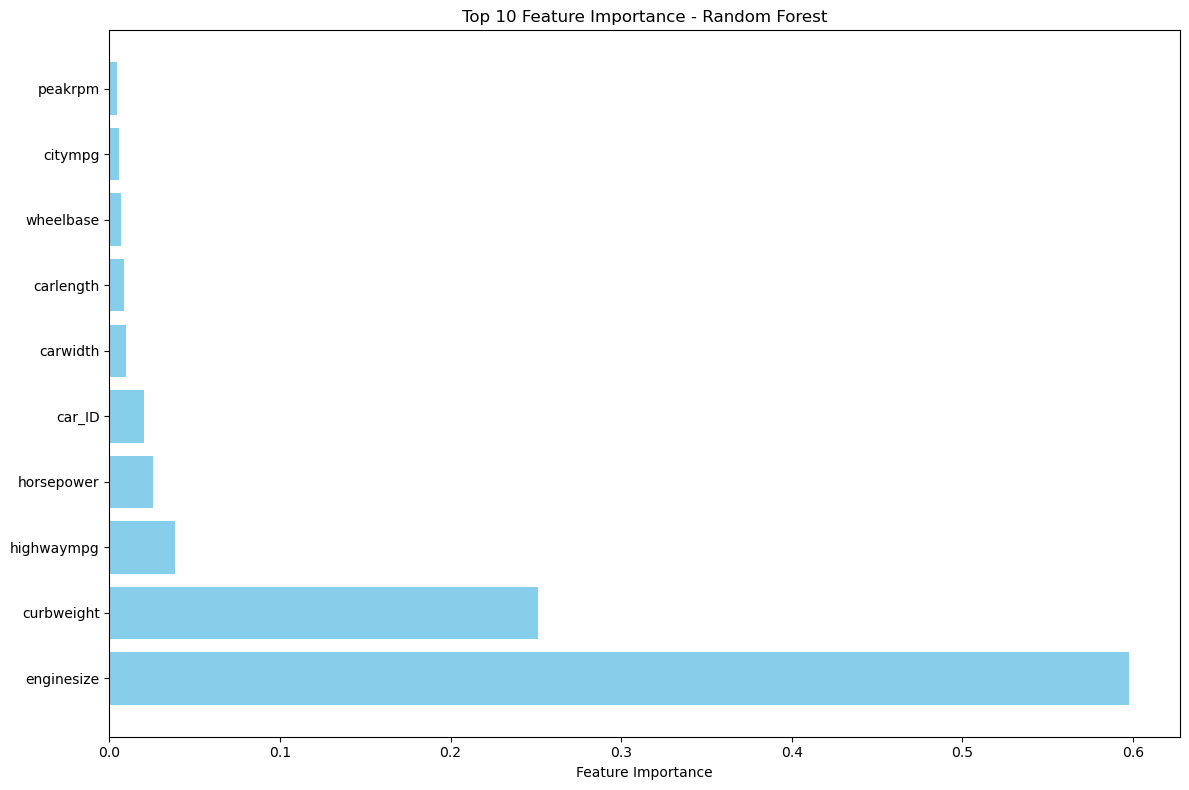

In [33]:
# Step 4: Feature Importance Analysis (for tree-based models)
import matplotlib.pyplot as plt
import numpy as np

# Feature importance for Random Forest
importance_rf = rf.feature_importances_
features = X.columns

# Sort the feature importances in descending order
sorted_idx = np.argsort(importance_rf)[::-1]

# Limit the number of features displayed (top 10, for example)
top_n = 10
sorted_idx = sorted_idx[:top_n]  # Show only top N features

# Create a bar chart
plt.figure(figsize=(12, 8))  # Increase figure size to provide more space
plt.barh(np.array(features)[sorted_idx], importance_rf[sorted_idx], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importance - Random Forest')

# Rotate y-axis labels for better readability
plt.yticks(rotation=0)

# Display the chart
plt.tight_layout()
plt.show()





5. Hyperparameter Tuning

Perform hyperparameter tuning and check whether the performance of the model has increased.

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Initialize GridSearchCV for RandomForestRegressor
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=3, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best model after tuning
best_rf = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = best_rf.predict(X_test)

# Performance metrics for the tuned model
r2_best = r2_score(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Display the performance metrics of the tuned model
print("\nBest Random Forest Model (after Hyperparameter Tuning):")
print(f"R-squared: {r2_best:.4f}")
print(f"Mean Squared Error: {mse_best:.4f}")
print(f"Mean Absolute Error: {mae_best:.4f}")
print("\nBest Hyperparameters for Random Forest:", grid_search.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=5, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, min_samples_split=5, n_est